# Machine Learning 2024-2025 - UMONS

# Introduction to Regression and Classification with Scikit-Learn

This notebook is an introduction to the library [scikit-learn](https://scikit-learn.org/stable/), which provides numerous tools to easily perform machine learning tasks. 

In this lab, we will experiment with two of the most frequently encountered tasks in machine learning: 
  - **Regression**, for a continous outcome.
  - **Classification**, for a discrete outcome.

In order for you to first have a good feeling of the general pipeline of a machine learning task, we will perform:
- Data splitting,
- Linear regression,
- One-hot encoding,
- $K$-nearest-neighbors classification,
- Basic metrics for regression and classification,
- Confusion matrices.

We will start with an example of linear regression. Make sure you understand every line of the example.

**Import the necessary libraries.**

In [149]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder

np.set_printoptions(precision=2)
#make plots interactives


**Load the 'Pokemon.csv' dataset as a Pandas Dataframe.**

In [150]:
df = pd.read_csv('data/Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


**Change the Type 1 and Type 2 variables to categorical.**

In [151]:
print(df.dtypes)
df = df.astype({'Type 1': 'category', 'Type 2': 'category', 'Generation': 'category', 'Legendary': 'category'})
df.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object


#                int64
Name            object
Type 1        category
Type 2        category
Total            int64
HP               int64
Attack           int64
Defense          int64
Sp. Atk          int64
Sp. Def          int64
Speed            int64
Generation    category
Legendary     category
dtype: object

**Create a variable `X` containing the predictor 'Attack' and a variable `y` containing the target variable 'HP'.**

<Axes: xlabel='Attack', ylabel='HP'>

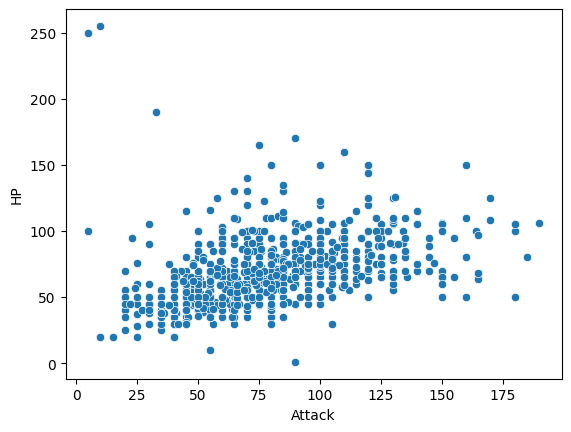

In [152]:
X = df[['Attack']]
y = df['HP']
sns.scatterplot(x='Attack', y='HP', data=df)

**Split the dataset into training and test sets following an 80%/20% partition.**

In [153]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, test_size=0.2, shuffle=True, random_state=0
)

(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((640, 1), (640,)), ((160, 1), (160,)))

**Build a linear regression model and fit it to the training data.**

In [154]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

LinearRegression()

**Compute the mean squared error (MSE) on both the training and test sets.**

In [155]:
# Make predictions for both the training and the test sets.
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Compute the coefficient of determination and the mean square error on both sets.
MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)

print(f'MSE on training set: {MSE_train:.2f}')
print(f'MSE on test set: {MSE_test:.2f}')

MSE on training set: 486.52
MSE on test set: 732.01


**Plot the regression line.**

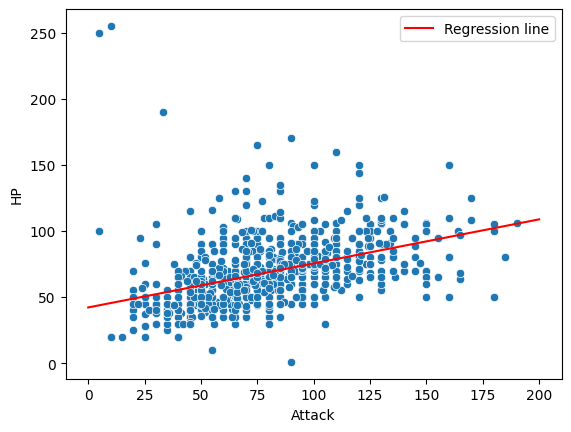

In [156]:
# Generate predictions out of the fitted model.
x_plot = pd.DataFrame(np.linspace(0, 200, 100), columns=['Attack'])
y_plot = model.predict(x_plot)

# Plot the regression line.
fig, ax = plt.subplots()
ax = sns.scatterplot(x='Attack', y='HP', data=df)
ax.plot(x_plot, y_plot, label='Regression line', color='red')
ax.legend();

## Regression task with a Linear Regression model

**1) Your turn! Create a variable `X` containing the predictors 'Attack' and 'Defense' and a variable `y` containing the target variable 'HP'.**

<Axes: xlabel='Attack', ylabel='Defense'>

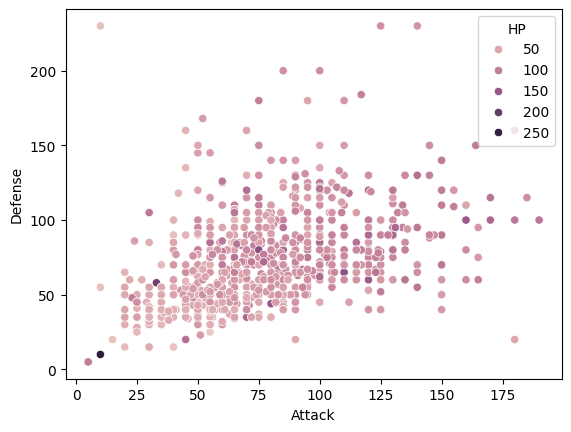

In [157]:
X = df[['Attack','Defense']]
y = df['HP']
sns.scatterplot(x="Attack" , y='Defense' ,hue='HP', data=df)

**2) Split the dataset into a training and a test set. Follow an 80%/20% split partition, and make sure the dataset is shuffled.** 

In [158]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, test_size=0.2, shuffle=True, random_state=0
)

**3) Fit a linear regression model to the training data.** 

In [159]:
model2 = LinearRegression(fit_intercept=True)
model2.fit(X_train,y_train)

LinearRegression()

**4) What is the expression of the fitted model? You need to access the model's parameters using `.coef_` and `.intercept_` to answer this question. Plot the plane that is found.**

In [160]:
beta = model2.coef_ # c'est le β (β₁,...,βₙ)
beta0 = model2.intercept_ # c'est le β₀ dans la regression linéaire , c'est le biais
print(f" coef = β  = {beta}")
print(f"intercept = β₀ = {beta0}")


 coef = β  = [0.3  0.09]
intercept = β₀ = 38.663074415560565


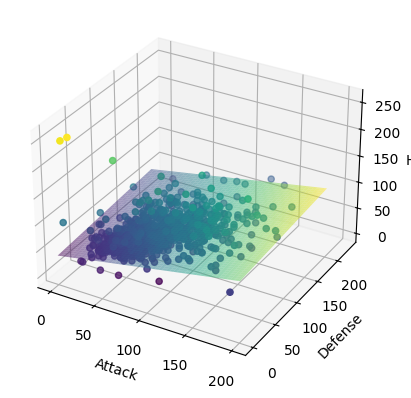

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Supposons que beta soit défini quelque part dans votre code
# beta = [beta0, b1, b2]

# Extraction des coefficients
b1, b2 = beta

# Génération des valeurs pour Attack et Defense
x1 = np.linspace(0, 200, 100)
x2 = np.linspace(0, 200, 100)
x1, x2 = np.meshgrid(x1, x2)

# Calcul des valeurs prédictes de HP
h = lambda x1, x2: beta0 + b1 * x1 + b2 * x2
y = h(x1, x2)

# Création de la figure et des axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Tracé du nuage de points
ax.scatter(df['Attack'], df['Defense'], df['HP'], c=df['HP'], cmap='viridis')

# Tracé du plan de régression
ax.plot_surface(x1, x2, y, cmap='viridis', alpha=0.5)

# Étiquettes des axes
ax.set_xlabel('Attack')
ax.set_ylabel('Defense')
ax.set_zlabel('HP')

# Affichage du graphique
plt.show()

**5) Using the fitted model, predict the values of the target variable 'HP' in the training and test sets.**

In [162]:
y_train_predict , y_test_predict = model2.predict(X_train) , model2.predict(X_test)

**6) For both the training and test sets, evaluate the model's predictions using the mean squared error (MSE). What do you observe?**

In [163]:
MSE_train2 = mean_squared_error(y_train , y_train_predict)
MSE_test2 = mean_squared_error(y_test , y_test_predict)
print(f"MSE on train_set = {MSE_train2}")
print(f"MSE on test_set = {MSE_test2}")

MSE on train_set = 480.6181535457323
MSE on test_set = 747.8547312682159


**7) Can you implement the mean squared error calculation on the test set and verify if the results match those obtained using scikit-learn?**

In [164]:
def mean_squared_error_manual(X,Y,b0,b)->float:
    """ implement the means quare error calculation on the test set to  verify if the results match those obtained using scikit-learn."""
    y_pred = b0 + np.dot(X,b.T)
    return np.mean((Y-y_pred)**2)


MSE_test_manual = mean_squared_error_manual(X_test,y_test,beta0,beta)
print(f"MSE on test_set using manual calculation = {MSE_test_manual}\nMSE on test_set using scikit-learn = {MSE_test}")


MSE on test_set using manual calculation = 747.854731268216
MSE on test_set using scikit-learn = 732.011222397552


**8) Consider the variable 'Generation' as additional predictor. We will treat it as a categorical variable and encode it using one-hot encoding.**

We will not feed 'Generation' as is to the model. 
Instead, we'll use the `OneHotEncoder` class to preprocess it, which will create a new binary variable 
(also called 'dummy variable') for each of the $K$ categories of 'Generation'.

Here, 'Generation' possesses $K=6$ categories, so the one-hot-encoding will create 6 binary variables. 
For each dummy variable, a '1' means that the observation belongs to that category, while a '0' 
means it does not. Note that, as each observation belongs to a single category, only 1 of the 6 
dummy variables will take on the value '1', while the rest will be '0's. For instance, generation 2 will be encoded as `[0, 1, 0, 0, 0, 0]`.

**We can retrieve the categories of the variable 'Generation' using the method `Series.cat.categories`.**

In [165]:
df['Generation'].cat.categories

Index([1, 2, 3, 4, 5, 6], dtype='int64')

**8.1) Create a variable `X` containing the predictors 'Attack', 'Defense', and 'Generation', and a variable `y` containing the target variable 'HP'.**

In [166]:
X3 = df[['Attack', 'Defense', 'Generation']]
y3 = df['HP']
#sns.scatterplot(x='Attack', y='Defense', hue='HP', data=df)

**8.2) Split the dataset intro training and test sets following a 80%/20% partition.**

In [167]:
X3_train, X3_test, y3_train, y3_test = train_test_split(
    X3, y3, train_size=0.8, test_size=0.2, shuffle=True, random_state=0
)

**We create a one-hot encoding for the variable 'Generation' using the `OneHotEncoder` class. Unknown categories are ignored using `handle_unknown='ignore'` (in the sense that all dummy columns are set to 0).**

In [168]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Function to remove the column to be encoded and add the encoded columns with correct feature names
def encode_df(df, ohe):
    encoding = ohe.transform(df[['Generation']])
    return pd.concat([
        df.drop(columns='Generation').reset_index(drop=True),
        pd.DataFrame(encoding, columns=ohe.get_feature_names_out())
    ], axis=1)

**8.3) Fit the one-hot-encoder exclusively to the training set for the variable 'Generation'. Then, remove the column to be encoded and add the encoded columns with correct feature names. You can use the function `encode_df` defined above.**

In [169]:
# Fit the OneHotEncoder to the training data
ohe.fit(X3_train[['Generation']])

# Encode the training data
X3_train_encoded = encode_df(X3_train, ohe)
X3_test_encoded = encode_df(X3_test, ohe)

#
print(X3_train_encoded.head())

   Attack  Defense  Generation_1  Generation_2  Generation_3  Generation_4  \
0      65       64           0.0           1.0           0.0           0.0   
1      90       50           1.0           0.0           0.0           0.0   
2     110       80           1.0           0.0           0.0           0.0   
3      55       52           0.0           0.0           0.0           0.0   
4      95       80           1.0           0.0           0.0           0.0   

   Generation_5  Generation_6  
0           0.0           0.0  
1           0.0           0.0  
2           0.0           0.0  
3           0.0           1.0  
4           0.0           0.0  


Any pre-processing step must be fitted to the training data only, as it would otherwise result in *data leakage* (i.e., the model having access to information contained in the test set during training). Once it is fitted to the training set, it can be then applied to the test set. 

This also includes the cases where you replace missing values with a column statistic (i.e., mean, media, max, min, etc.).

**8.4) Fit the Linear Regression model to the training set, and get the model's coefficients. What function does the model find now?**

In [170]:
model3 = LinearRegression(fit_intercept=True)
model3.fit(X3_train_encoded, y3_train)
beta3 = model3.coef_
b0_3 =model3.intercept_
print(f"les paramètres sont β = {beta3}\nβ₀ = {b0_3} ")

les paramètres sont β = [ 0.3   0.08 -3.04  3.18 -2.39  2.64  1.48 -1.87]
β₀ = 38.99402359621929 


**8.5) Predict the MSE on the training and test sets.**

In [171]:
y3_train_predict , y3_test_predict = model3.predict(X3_train_encoded),model3.predict(X3_test_encoded)

MSE_train3 , MSE_test3 = mean_squared_error(y3_train_predict,y3_train),mean_squared_error(y3_test_predict ,y3_test)
print(f"MSE on train  set = {MSE_train3}")
print(f"MSE on train  set = {MSE_test3}")

MSE on train  set = 474.4247361883483
MSE on train  set = 737.4971855006672


## Classification Task with a KNN classifier

**9) Using the function `sns.histplot`, plot three histograms showing the distribution of the 'HP', 'Attack', and 'Defense' variables, using the `hue` parameter to distinguish if Pokemons are legendary. What do you observe?**

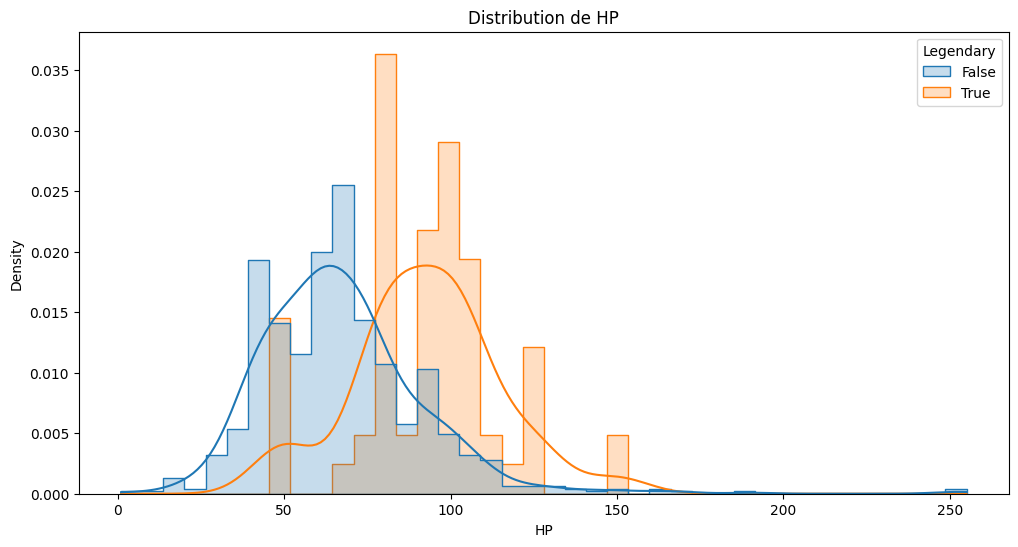

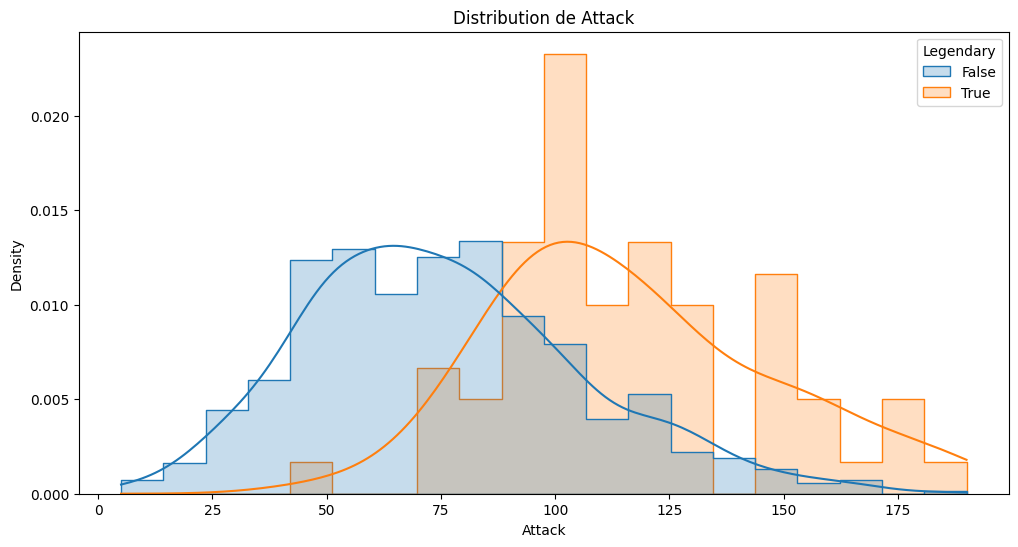

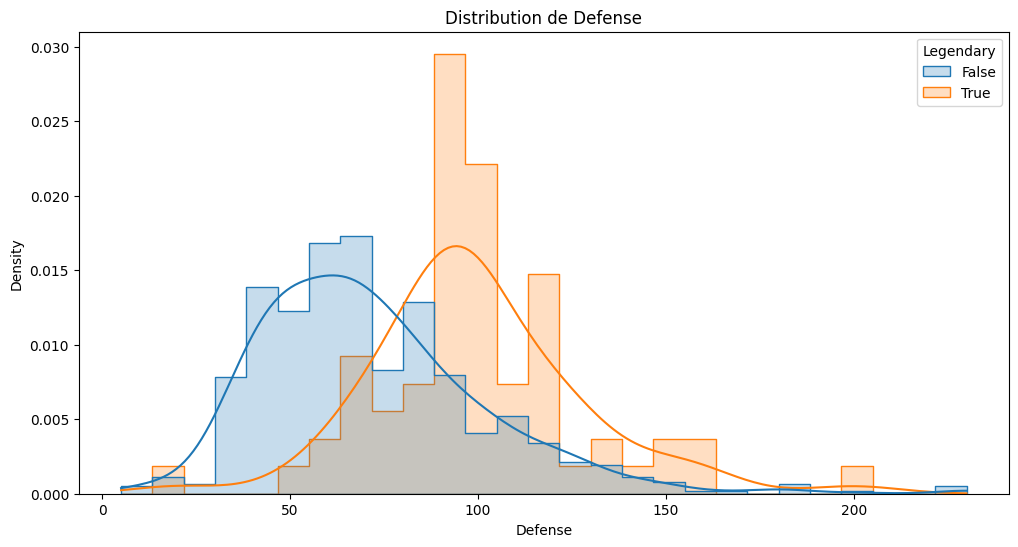

In [172]:

# Tracer l'histogramme pour la variable 'HP'
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='HP', hue='Legendary', kde=True, element='step', stat='density', common_norm=False)
plt.title('Distribution de HP')
plt.show()

# Tracer l'histogramme pour la variable 'Attack'
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Attack', hue='Legendary', kde=True, element='step', stat='density', common_norm=False)
plt.title('Distribution de Attack')
plt.show()

# Tracer l'histogramme pour la variable 'Defense'
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Defense', hue='Legendary', kde=True, element='step', stat='density', common_norm=False)
plt.title('Distribution de Defense')
plt.show()

**10) Use the `KNeighborsClassifier` class of scikit-learn with 5 neighbors to predict whether a Pokemon is legendary or not, using the variables 'Attack', 'Defense', and 'HP' as features. To this end, apply the following steps:**
- **Select the features and the target variable.**
- **Split your dataset into a training and test set following a 80%/20% partition.**
- **Fit the model to the training set, and predict the variable 'Legendary' on the training and test sets.**

In [173]:
iris = load_iris()
X4 = df[['Attack','Defense','HP']]
y4 = df['Legendary']

In [174]:
X4_train, X4_test, y4_train, y4_test = train_test_split(
    X4, y4, train_size=0.8, test_size=0.2, shuffle=True, random_state=0
)

In [175]:
model4 = KNeighborsClassifier(n_neighbors=5)
model4.fit(X4_train, y4_train)
y4_pred_train = model4.predict(X4_train)
y4_pred_test = model4.predict(X4_test)

**11) Compute the accuracy score of the model's predictions on the training and test sets using the function `accuracy_score`.** 

In [176]:
acc_train = accuracy_score(y4_train, y4_pred_train)
acc_test = accuracy_score(y4_test, y4_pred_test)
print(f"accuracy_score on train set: {acc_train}")
print(f"accuracy_score on test set: {acc_test}")

accuracy_score on train set: 0.934375
accuracy_score on test set: 0.9125


**12) Can you implement the accuracy calculation on the test set and verify if the results match those obtained using scikit-learn?**

In [177]:
def accuracy_score_manual(y_true, y_pred):
    correct = np.equal(y_true, y_pred)
    return sum(correct) / len(y_true)

acc_train_manual = accuracy_score_manual(y4_train, y4_pred_train)
acc_test_manual = accuracy_score_manual(y4_test, y4_pred_test)

print(f"accuracy_score on test set using manual function = {acc_test_manual} vs {acc_test} using scikit-learn")

print(f"accuracy_score on test set using manual function =  {acc_train_manual} vs {acc_train} using scikit-learn")


accuracy_score on test set using manual function = 0.9125 vs 0.9125 using scikit-learn
accuracy_score on test set using manual function =  0.934375 vs 0.934375 using scikit-learn


**13) Look at the distribution of the variable 'Legendary' in the test dataset using `sns.countplot`. What do you observe?**

C:\Users\lance\AppData\Local\Temp\ipykernel_38524\2940064739.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=y4_test.to_frame(), x='Legendary', palette="Set2" )


<Axes: xlabel='Legendary', ylabel='count'>

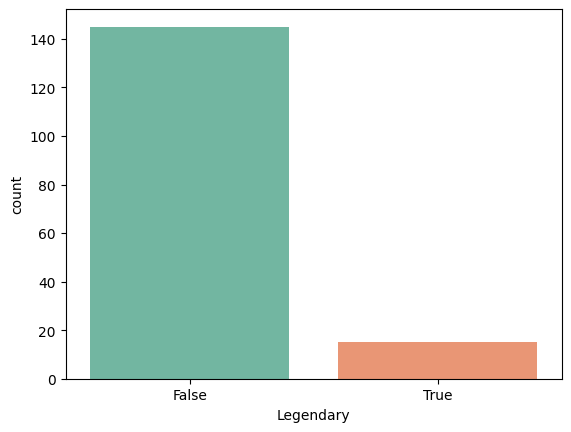

In [178]:
sns.countplot(data=y4_test.to_frame(), x='Legendary', palette="Set2" )

**14) Get the *confusion matrix* of the predictions on the test set using the `confusion_matrix` function. What do you observe and how do you link your observations to the accuracy of the model?**

In a confusion matrix $\mathbf{C}$, the entries $\mathbf{C}_{0,0}$, $\mathbf{C}_{0,1}$, $\mathbf{C}_{1,0}$, and $\mathbf{C}_{1,1}$ are the number of True Negatives, False Positives, False Negatives and True Positives, respectively. 

confusion_matrix C = [[143   2]
 [ 12   3]] 


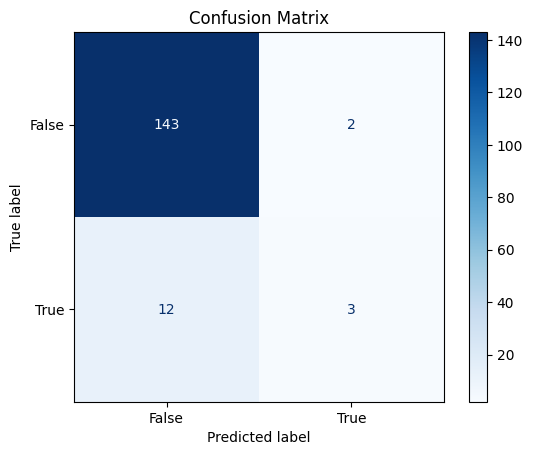

In [179]:
# Compute the confusion matrix
cm = confusion_matrix(y4_test, y4_pred_test)
print(f"confusion_matrix C = {cm} ")
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['False', 'True'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

